# Case study on Pre-processing

In [76]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment.

In [77]:
#read the dataset
data=pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column.

In [78]:
data.set_index(['PassengerId'],inplace=True)

In [79]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset.

In [80]:
# checking for number of rows and columns
data.shape

(891, 11)

In [81]:
#checking the number of columns and type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [82]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset.

In [83]:
# checking null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Here, we can conclude that age,cabin and embarked having missing values.

we need to find normal distribution or not

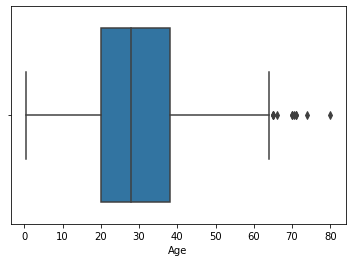

In [84]:
sns.boxplot(data['Age'])
plt.show()

Since there are outliers we cannot use the mean for replacing the missing values.

In [85]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [86]:
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [87]:
data['Cabin'].fillna('F',inplace=True)

In [88]:
data['Embarked'].mode()

0    S
dtype: object

In [89]:
data['Embarked'].fillna('F',inplace=True)

In [90]:
# Again checking any null values
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

There are no null values in the dataset, hence it is clean.

# 5. Check and handle outliers in at least 3 columns in the dataset.

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


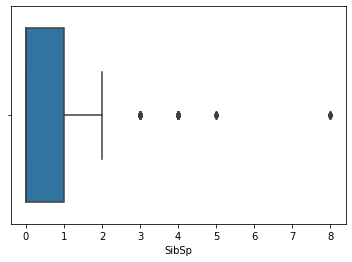

In [91]:
# checking outliers using percentile method
q1_s = np.percentile(data['SibSp'], 25)
q3_s = np.percentile(data['SibSp'], 75)
iqr_s = q3_s - q1_s
uplim_s = q3_s + (1.5*iqr_s)
lowlim_s = q1_s - (1.5*iqr_s)

out_s = []
for x in data['SibSp']:
    if (x<lowlim_s) or (x>uplim_s):
        out_s.append(x)
print(out_s)

sns.boxplot(data['SibSp'])
plt.show()

In [92]:
for x in data['SibSp']:
    if x>uplim_s:
        data['SibSp'].replace(x, uplim_s, inplace=True)

<AxesSubplot:xlabel='SibSp'>

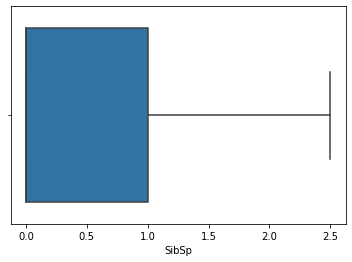

In [93]:
sns.boxplot(data['SibSp'])


[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


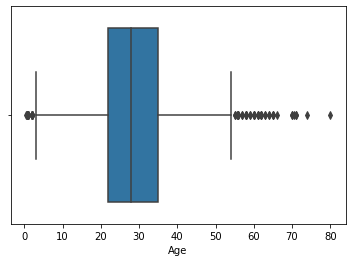

In [94]:
q1_age = np.percentile(data['Age'], 25)
q3_age = np.percentile(data['Age'], 75)
iqr_age = q3_age - q1_age
uplim_age = q3_age + (1.5*iqr_age)
lowlim_age = q1_age - (1.5*iqr_age)

out_age = []
for x in data['Age']:
    if (x>uplim_age) or (x<lowlim_age):
        out_age.append(x)
print(out_age)

sns.boxplot(data['Age'])
plt.show()

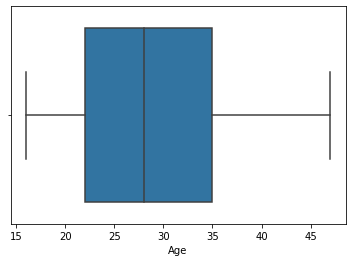

In [95]:
p10_age = np.percentile(data['Age'], 10)
p90_age = np.percentile(data['Age'], 90)
for x in data['Age']:
    if (x<p10_age):
        data['Age'].replace(x, p10_age, inplace=True)
    elif (x>p90_age):
        data['Age'].replace(x, p90_age, inplace=True)

sns.boxplot(data['Age'])
plt.show()

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


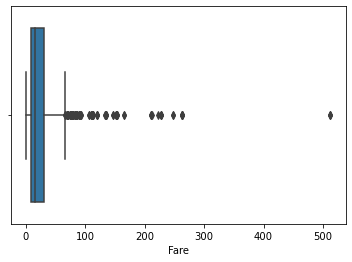

In [96]:
q1_f = np.percentile(data['Fare'], 25)
q3_f = np.percentile(data['Fare'], 75)
iqr_f = q3_f - q1_f
uplim_f = q3_f + (1.5*iqr_f)
lowlim_f = q1_f - (1.5*iqr_f)
out_f = []
for x in data['Fare']:
    if (x<lowlim_f) or (x>uplim_f):
        out_f.append(x)
print(out_f)
sns.boxplot(data['Fare'])
plt.show()

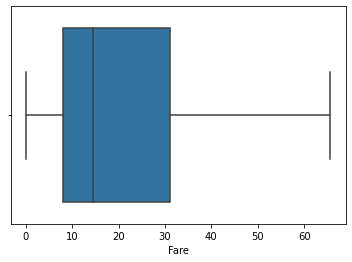

In [97]:
for x in data['Fare']:
    if (x>uplim_f):
        data['Fare'].replace(x, uplim_f, inplace=True)
    elif (x<lowlim_f):
        data['Fare'].replace(x, lowlim_f, inplace=True)
sns.boxplot(data['Fare'])
plt.show()

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target).

In [105]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp       float64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [106]:
y = data['Survived']
x = data.drop(['Survived', 'Sex', 'Fare','Age', 'Embarked'], axis=1)

In [107]:
x.describe()

,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000
mean,2.308642,0.426487,0.381594
std,0.836071,0.708246,0.806057
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,2.500000,6.000000


In [113]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [114]:
x = pd.DataFrame(x)
x.describe()

,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000
mean,2.308642,0.426487,0.381594
std,0.836071,0.708246,0.806057
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,2.500000,6.000000


In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE is', mean_squared_error(y_test, predictions))
from sklearn.metrics import r2_score
print('R squared value is', r2_score(y_test, predictions))

ValueError: could not convert string to float: 'Partner, Mr. Austen'